In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [511]:
data= pd.read_csv("../data/우럭.csv")

In [398]:
data['규격'].unique()

array([nan, '15미', '18미', '04미', '중', '08미', '10미', '12미', '소', '24미',
       '06미', '20미', '16미', '05미', '11미', '19미', '17미', '4단', '대',
       '200/300', '09미', '1단', '03미', '5단', '01미', '특대', '5통', '02미',
       '30미', '80/100', '35미', '07미', '40미', '34미', '50미', '26미',
       '10/11미', '55미', '25미', '13미', '600/700', '5/6미', '6/7미', '3/4미',
       '4/5미', '진통', '12/13미', '300/400', '500/600', '150/200', 'L',
       '14/15미', '28미', '22미', '14미', '3단', '파치', '9/10미', '15/16미',
       '11/12미', 'S', '7/8미', '400/500', '42미', '21미', '100/150', '80미',
       '23미', '바라', '6미', '3미', '2미', '9미', '8미', '4미', '5미', '7미', '중멸',
       '소소', '중소', '34/35미', '27미', '1미', '7단', '8단', '54미', '48미', '36미',
       '대중', '33미', 'M', '45미', '2단', '16/17미', '10/12', '2/3미', '200미',
       '8/9미', '32미', '43미', '53미', '31미'], dtype=object)

In [399]:
data_test=data

In [400]:
data_test["수량"]=data_test["수량"].str.replace(',', '').astype('float64')
data_test["평균가"]=data_test["평균가"].str.replace(',', '').astype('int64')

In [401]:
data_test

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,일시
0,(활)우럭,서산,NaN,NaN,104.7,1.0,"18,000","9,500",14000,2000.01.02
1,(활)우럭,서산,NaN,NaN,107.2,1.0,"29,000","20,000",24100,2000.01.03
2,(활)우럭,제주,NaN,NaN,302.1,1.0,"21,500","6,000",12600,2000.01.03
3,(활)우럭,목포,NaN,NaN,574.6,1.0,"11,000","5,000",8900,2000.01.03
4,(활)우럭,기타,NaN,NaN,24.6,1.0,"20,000","7,000",13200,2000.01.03
...,...,...,...,...,...,...,...,...,...,...
32589,(선)우럭,삼천포,12미,S/P,9.0,10.0,"5,000","5,000",5000,2021.03.31
32590,(선)우럭,삼천포,13미,S/P,6.0,10.0,"5,000","5,000",5000,2021.03.31
32591,(활)우럭,통영,중,kg,131.2,1.0,"20,000","3,000",12800,2021.04.01
32592,(선)우럭,통영,중,kg,354.7,1.0,"16,000","5,000",10500,2021.04.01


In [402]:
del data_test['규격']
del data_test['포장']

In [403]:
data_test['1kg 평균가격'] = round(data_test['평균가']/data_test['중량'])

In [404]:
data_test['월']=pd.to_datetime(data_test['일시']).dt.month

In [405]:
data_test.sort_values(by='평균가',ascending=False)

,어종,산지,수량,중량,낙찰고가,낙찰저가,평균가,일시,1kg 평균가격,월
31396,(선)우럭,군산,1.0,10.0,"260,400","260,400",260400,2020.04.03,26040.0,4
31312,(선)우럭,군산,1.0,10.0,"225,000","225,000",225000,2020.03.09,22500.0,3
23416,(선)우럭,삼천포,1.0,25.0,"200,000","200,000",200000,2015.07.31,8000.0,7
16778,(선)우럭,삼천포,1.0,22.0,"200,000","200,000",200000,2011.11.25,9091.0,11
22765,(선)우럭,제주도,1.0,12.0,"192,000","192,000",192000,2015.04.30,16000.0,4
...,...,...,...,...,...,...,...,...,...,...
7035,(활)우럭,중국,1.0,1.0,500,500,500,2003.10.21,500.0,10
17258,(선)우럭,통영,2.2,1.0,500,500,500,2012.03.05,500.0,3
16348,(선)우럭,서산,102.0,1.0,500,500,500,2011.08.13,500.0,8
27502,(선)우럭,중국,438.9,1.0,"5,000",100,400,2017.09.20,400.0,9


# 이상치 탐지
- boxplot()을 보면 이상치 존재 파악이 쉽다
- 표준스케일링 한 후 값이 큰것들을 이상치로 봄 (6이상 일때)

In [406]:
data_money = data_test[data_test['1kg 평균가격']<=26040]

<AxesSubplot:>

C:\Users\hope\.conda\envs\Python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hope\.conda\envs\Python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hope\.conda\envs\Python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hope\.conda\envs\Python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hope\.conda\envs\Python\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hope\.conda\envs\Python\lib\site-packages\matplotlib\backends\backend_agg.py:2

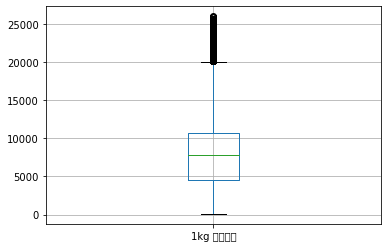

In [407]:
data_money[['1kg 평균가격']].boxplot()

In [408]:
from sklearn.preprocessing import StandardScaler # 표준 스케일링 함수
scale = StandardScaler()

data_money['1kg 평균가격_sc']=scale.fit_transform(data_money[['1kg 평균가격']])

<ipython-input-408-6aebfa82e3af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_money['1kg 평균가격_sc']=scale.fit_transform(data_money[['1kg 평균가격']])


<AxesSubplot:>

C:\Users\hope\.conda\envs\Python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hope\.conda\envs\Python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hope\.conda\envs\Python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hope\.conda\envs\Python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hope\.conda\envs\Python\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hope\.conda\envs\Python\lib\site-packages\matplotlib\backends\backend_agg.py:2

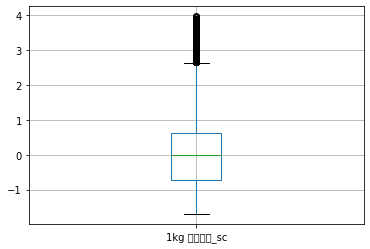

In [409]:
data_money[['1kg 평균가격_sc']].boxplot()

In [410]:
## 제거할만한 이상치 없음

In [411]:
## 한국에서 잡힌 우럭만 추출
data_loca = data_money

In [412]:
data_loca['산지'].unique()

array(['서산', '제주', '목포', '기타', '충무', '인천', '격포', '군산', '장항', '완도', '남해',
       '대천', '부안', '포항', '중국', '삼천포', '여수', '속초', '부산', '고흥', '일본', '거진',
       '뉴질랜드', '동해시', '강화', '임원', '마산', '태안', '화성', '삼척', '만리포', '주문진',
       '오만', '거문도', '안흥', '축산', '대진', '서천', '곰소', '영덕', '미국', '거제도', '후포',
       '나로도', '감포', '구룡포', '노르웨이', '울진', '대부도', '소래', '고성', '범성', '북한',
       '죽변', '아이슬란드', '추자도', '방어진', '벌교', '러시아', '해남', '태국', '강구', '필리핀',
       '문산', '백령도', '기타(국내)', '통영', '부산(기장)', '제주도', '보령', '(원양)미국',
       '(원양)중국', '(원양)러시아', '포르투갈', '흑산도', '진도', '(원양)아르헨티나', '사천', '스페인',
       '대서양', '신안', '울릉도', '기타(수입)', '캐나다', '영광', '당진', '안면도'],
      dtype=object)

In [413]:
data_loca = data_loca[~ data_loca['산지'].isin(['포르투갈','아이슬란드','(원양)아르헨티나', '대서양','캐나다','(원양)미국','인도네시아', '일본', '미국', '중국','오만','베트남','뉴질랜드','노르웨이','러시아','인도','포클랜드','필리핀','대만','태국','멕시코','(원양)중국','라스팔마스','(원양)러시아','(원양)인도네시아','스페인','CONGO. THE DEMOCRATIC REPUBLIC','인도양','아르메니아','콩고','(원양)멕시코','이란','세네갈','파키스탄','소말리아','(원양)라스팔마스','앙골라','아르헨티나','기타(원양)','기타','기타(수입)','태평양'])]

In [414]:
data_loca['산지'].unique()

array(['서산', '제주', '목포', '충무', '인천', '격포', '군산', '장항', '완도', '남해', '대천',
       '부안', '포항', '삼천포', '여수', '속초', '부산', '고흥', '거진', '동해시', '강화', '임원',
       '마산', '태안', '화성', '삼척', '만리포', '주문진', '거문도', '안흥', '축산', '대진',
       '서천', '곰소', '영덕', '거제도', '후포', '나로도', '감포', '구룡포', '울진', '대부도',
       '소래', '고성', '범성', '북한', '죽변', '추자도', '방어진', '벌교', '해남', '강구', '문산',
       '백령도', '기타(국내)', '통영', '부산(기장)', '제주도', '보령', '흑산도', '진도', '사천',
       '신안', '울릉도', '영광', '당진', '안면도'], dtype=object)

In [415]:
#동해권(강원, 경북,덕적도), 서해권(경기, 충남, 전북), 남해권(전남, 울산, 경남, 부산, 제주,)
# 포항 (2008~),울릉도(2011~),신안,추자도,부안,통영,울진,인천,거문도,거제도

In [416]:
# 칠발도(서남) ,마라도(제주도아래),외연도(서해),홍도(서남),서해206(서남),서해170(서해)

In [417]:
# 우럭
### 제주도 -> 제주


# 해상
### 서귀포 -> 제주

In [418]:
sea= pd.read_csv("../data/해상기상_위치.csv")

### 날짜 데이터 변경

In [419]:
data_loca['일시']=data_loca['일시'].str.replace(".","-")
data_loca

<ipython-input-419-fa8dfa4dab8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loca['일시']=data_loca['일시'].str.replace(".","-")


,어종,산지,수량,중량,낙찰고가,낙찰저가,평균가,일시,1kg 평균가격,월,1kg 평균가격_sc
0,(활)우럭,서산,104.7,1.0,"18,000","9,500",14000,2000-01-02,14000.0,1,1.341205
1,(활)우럭,서산,107.2,1.0,"29,000","20,000",24100,2000-01-03,24100.0,1,3.549045
2,(활)우럭,제주,302.1,1.0,"21,500","6,000",12600,2000-01-03,12600.0,1,1.035168
3,(활)우럭,목포,574.6,1.0,"11,000","5,000",8900,2000-01-03,8900.0,1,0.226355
5,(활)우럭,충무,459.6,1.0,"26,000","5,000",14700,2000-01-03,14700.0,1,1.494224
...,...,...,...,...,...,...,...,...,...,...,...
32589,(선)우럭,삼천포,9.0,10.0,"5,000","5,000",5000,2021-03-31,500.0,3,-1.609868
32590,(선)우럭,삼천포,6.0,10.0,"5,000","5,000",5000,2021-03-31,500.0,3,-1.609868
32591,(활)우럭,통영,131.2,1.0,"20,000","3,000",12800,2021-04-01,12800.0,4,1.078888
32592,(선)우럭,통영,354.7,1.0,"16,000","5,000",10500,2021-04-01,10500.0,4,0.576112


### 산지 변경


'서산', '제주', '목포', '충무', '인천', '격포', '군산', '장항', '완도', '남해', '대천',
       '부안', '포항', '삼천포', '여수', '속초', '부산', '고흥', '거진', '동해시', '강화', '임원',
       '마산', '태안', '화성', '삼척', '만리포', '주문진', '거문도', '안흥', '축산', '대진',
       '서천', '곰소', '영덕', '거제도', '후포', '나로도', '감포', '구룡포', '울진', '대부도',
       '소래', '고성', '범성', '북한', '죽변', '추자도', '방어진', '벌교', '해남', '강구', '문산',
       '백령도', '기타(국내)', '통영', '부산(기장)', '제주도', '보령', '흑산도', '진도', '사천',
       '신안', '울릉도', '영광', '당진', '안면도'
       
       
       
       
       
##### 변경       
'거문도', '거제도', '덕적도', '칠발도', '동해', '마라도', '포항', '외연도', '울릉도', '신안',
       '추자도', '부안', '통영', '울산', '서귀포', '울진', '인천', '홍도', '서해206', '서해170',
       '가거도'

제주도 -> 제주
목포 -> 가거도
충무 -> 거문도 or 통영 (거문도가 없을시 통영으로 변경함)
격포 -> 부안
군산 -> 부안
장항 -> 덕적도
완도 -> 가거도
대천 -> 부안
삼천포 -> 거문도
여수 -> 거문도
속초 -> 동해
고흥 -> 추자도
거진 -> 동해
강화 -> 덕적도
임원 -> 울진
 등등.........

In [420]:
data_loca['위치']=0

<ipython-input-420-65f2fe4fb736>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loca['위치']=0


In [421]:
data_loc_t=data_loca['위치']

In [422]:
data_loc_t

0        0
1        0
2        0
3        0
5        0
        ..
32589    0
32590    0
32591    0
32592    0
32593    0
Name: 위치, Length: 31259, dtype: int64

In [423]:
data_loc_t[data_loca['산지']=='서산']='외연도'
data_loc_t[data_loca['산지']=='제주도']='서귀포'
data_loc_t[data_loca['산지']=='제주']='서귀포'
data_loc_t[data_loca['산지']=='목포']='가거도'
data_loc_t[data_loca['산지']=='충무']='거문도'
data_loc_t[data_loca['산지']=='격포']='부안'
data_loc_t[data_loca['산지']=='군산']='부안'
data_loc_t[data_loca['산지']=='장항']='덕적도'
data_loc_t[data_loca['산지']=='완도']='가거도'
data_loc_t[data_loca['산지']=='대천']='부안'
data_loc_t[data_loca['산지']=='삼천포']='거문도'
data_loc_t[data_loca['산지']=='여수']='거문도'
data_loc_t[data_loca['산지']=='속초']='동해'
data_loc_t[data_loca['산지']=='고흥']='추자도'
data_loc_t[data_loca['산지']=='거진']='동해'
data_loc_t[data_loca['산지']=='강화']='덕적도'
data_loc_t[data_loca['산지']=='임원']='울진'
data_loc_t[data_loca['산지']=='마산']='울진'
data_loc_t[data_loca['산지']=='태안']='울진'
data_loc_t[data_loca['산지']=='화성']='덕적도'
data_loc_t[data_loca['산지']=='삼척']='울진'
data_loc_t[data_loca['산지']=='만리포']='외연도'
data_loc_t[data_loca['산지']=='주문진']='동해'
data_loc_t[data_loca['산지']=='안흥']='외연도'
data_loc_t[data_loca['산지']=='축산']='울산'
data_loc_t[data_loca['산지']=='대진']='통영'
data_loc_t[data_loca['산지']=='서천']='부안'
data_loc_t[data_loca['산지']=='곰소']='신안'
data_loc_t[data_loca['산지']=='영덕']='울산'
data_loc_t[data_loca['산지']=='후포']='울진'
data_loc_t[data_loca['산지']=='나로도']='거문도'
data_loc_t[data_loca['산지']=='감포']='울산'
data_loc_t[data_loca['산지']=='구룡포']='울산'
data_loc_t[data_loca['산지']=='대부도']='덕적도'
data_loc_t[data_loca['산지']=='소래']='덕적도'
data_loc_t[data_loca['산지']=='고성']='동해'
data_loc_t[data_loca['산지']=='범성']='NULL'
data_loc_t[data_loca['산지']=='북한']='NULL'
data_loc_t[data_loca['산지']=='방어진']='거제도'
data_loc_t[data_loca['산지']=='벌교']='거문도'
data_loc_t[data_loca['산지']=='죽변']='울진'
data_loc_t[data_loca['산지']=='해남']='가거도'
data_loc_t[data_loca['산지']=='강구']='거제도'
data_loc_t[data_loca['산지']=='문산']='거문도'
data_loc_t[data_loca['산지']=='백령도']='인천'
data_loc_t[data_loca['산지']=='보령']='부안'
data_loc_t[data_loca['산지']=='흑산도']='홍도'
data_loc_t[data_loca['산지']=='진도']='가거도'
data_loc_t[data_loca['산지']=='사천']='거문도'
data_loc_t[data_loca['산지']=='영광']='신안'
data_loc_t[data_loca['산지']=='당진']='외연도'
data_loc_t[data_loca['산지']=='안면도']='외연도'
data_loc_t[data_loca['산지']=='부산']='거제도'
data_loc_t[data_loca['산지']=='동해시']='동해'
data_loc_t[data_loca['산지']=='부산']='거제도'
data_loc_t[data_loca['산지']=='부산(기장)']='거제도'
data_loc_t[data_loca['산지']=='남해']='거문도'



data_loc_t[data_loca['산지']=='거문도']='거문도'
data_loc_t[data_loca['산지']=='거제도']='거제도'
data_loc_t[data_loca['산지']=='덕적도']='덕적도'
data_loc_t[data_loca['산지']=='칠발도']='칠발도'
data_loc_t[data_loca['산지']=='동해']='동해'
data_loc_t[data_loca['산지']=='마라도']='마라도'
data_loc_t[data_loca['산지']=='포항']='포항'
data_loc_t[data_loca['산지']=='외연도']='외연도'
data_loc_t[data_loca['산지']=='울릉도']='울릉도'
data_loc_t[data_loca['산지']=='신안']='신안'
data_loc_t[data_loca['산지']=='추자도']='추자도'
data_loc_t[data_loca['산지']=='부안']='부안'
data_loc_t[data_loca['산지']=='통영']='통영'
data_loc_t[data_loca['산지']=='울산']='울산'
data_loc_t[data_loca['산지']=='서귀포']='서귀포'
data_loc_t[data_loca['산지']=='울진']='울진'
data_loc_t[data_loca['산지']=='인천']='인천'
data_loc_t[data_loca['산지']=='홍도']='홍도'
data_loc_t[data_loca['산지']=='가거도']='가거도'

<ipython-input-423-7e8904d11e2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loc_t[data_loca['산지']=='서산']='외연도'
C:\Users\hope\.conda\envs\Python\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-423-7e8904d11e2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loc_t[data_loca['산지']=='제주도']='서귀포'
<ipython-input-423-7e8904d11e2

<ipython-input-423-7e8904d11e2d>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loc_t[data_loca['산지']=='후포']='울진'
<ipython-input-423-7e8904d11e2d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loc_t[data_loca['산지']=='나로도']='거문도'
<ipython-input-423-7e8904d11e2d>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loc_t[data_loca['산지']=='감포']='울산'
<ipython-input-423-7e8904d11e2d>:33: SettingWithCopyWarning: 
A value i

<ipython-input-423-7e8904d11e2d>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loc_t[data_loca['산지']=='남해']='거문도'
<ipython-input-423-7e8904d11e2d>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loc_t[data_loca['산지']=='거문도']='거문도'
<ipython-input-423-7e8904d11e2d>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loc_t[data_loca['산지']=='거제도']='거제도'
<ipython-input-423-7e8904d11e2d>:63: SettingWithCopyWarning: 
A valu

#### 위 데이터에 포함되지 않은 산지 검색

In [424]:
## 해양 데이터에 나타나있는 위치들
a = ['거문도', '거제도', '덕적도', '칠발도', '동해', '마라도', '포항', '외연도', '울릉도', '신안', '추자도', '부안', '통영', '울산', '서귀포', '울진', '인천', '홍도', '서해206', '서해170', '가거도']

In [425]:
data_loc_t[~ data_loc_t.isin(a)].unique()

array(['NULL', 0], dtype=object)

In [426]:
data_loca['위치']=data_loc_t

<ipython-input-426-4238942c7f4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loca['위치']=data_loc_t


In [427]:
## 'NULL', '기타(국내)' 는 위치를 특정할수 없으므로 제거
data_loc = data_loca[~ data_loca['위치'].isin(['NULL', '기타(국내)'])]

In [428]:
data_loc

,어종,산지,수량,중량,낙찰고가,낙찰저가,평균가,일시,1kg 평균가격,월,1kg 평균가격_sc,위치
0,(활)우럭,서산,104.7,1.0,"18,000","9,500",14000,2000-01-02,14000.0,1,1.341205,외연도
1,(활)우럭,서산,107.2,1.0,"29,000","20,000",24100,2000-01-03,24100.0,1,3.549045,외연도
2,(활)우럭,제주,302.1,1.0,"21,500","6,000",12600,2000-01-03,12600.0,1,1.035168,서귀포
3,(활)우럭,목포,574.6,1.0,"11,000","5,000",8900,2000-01-03,8900.0,1,0.226355,가거도
5,(활)우럭,충무,459.6,1.0,"26,000","5,000",14700,2000-01-03,14700.0,1,1.494224,거문도
...,...,...,...,...,...,...,...,...,...,...,...,...
32589,(선)우럭,삼천포,9.0,10.0,"5,000","5,000",5000,2021-03-31,500.0,3,-1.609868,거문도
32590,(선)우럭,삼천포,6.0,10.0,"5,000","5,000",5000,2021-03-31,500.0,3,-1.609868,거문도
32591,(활)우럭,통영,131.2,1.0,"20,000","3,000",12800,2021-04-01,12800.0,4,1.078888,통영
32592,(선)우럭,통영,354.7,1.0,"16,000","5,000",10500,2021-04-01,10500.0,4,0.576112,통영


### 해상, 물고기 날짜 위치 추가

In [429]:
len(data_loc)

31251

In [430]:
## 일시와 위치가 일치하면 데이터를 묶음

fish_sea_join = pd.merge(data_loc, sea, on=['위치','일시'], how='left')
print(fish_sea_join)

          어종   산지     수량    중량    낙찰고가    낙찰저가    평균가          일시  1kg 평균가격  \
0      (활)우럭   서산  104.7   1.0  18,000   9,500  14000  2000-01-02   14000.0   
1      (활)우럭   서산  107.2   1.0  29,000  20,000  24100  2000-01-03   24100.0   
2      (활)우럭   제주  302.1   1.0  21,500   6,000  12600  2000-01-03   12600.0   
3      (활)우럭   목포  574.6   1.0  11,000   5,000   8900  2000-01-03    8900.0   
4      (활)우럭   충무  459.6   1.0  26,000   5,000  14700  2000-01-03   14700.0   
...      ...  ...    ...   ...     ...     ...    ...         ...       ...   
31253  (선)우럭  삼천포    9.0  10.0   5,000   5,000   5000  2021-03-31     500.0   
31254  (선)우럭  삼천포    6.0  10.0   5,000   5,000   5000  2021-03-31     500.0   
31255  (활)우럭   통영  131.2   1.0  20,000   3,000  12800  2021-04-01   12800.0   
31256  (선)우럭   통영  354.7   1.0  16,000   5,000  10500  2021-04-01   10500.0   
31257  (선)우럭  삼천포    1.0  10.0   5,000   5,000   5000  2021-04-01     500.0   

       월  ...  평균기압(hPa) 평균 상대습도(%)  평균 기온(°C)  평균 

In [431]:
fish_sea_join

,어종,산지,수량,중량,낙찰고가,낙찰저가,평균가,일시,1kg 평균가격,월,...,평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,(활)우럭,서산,104.7,1.0,"18,000","9,500",14000,2000-01-02,14000.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(활)우럭,서산,107.2,1.0,"29,000","20,000",24100,2000-01-03,24100.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(활)우럭,제주,302.1,1.0,"21,500","6,000",12600,2000-01-03,12600.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(활)우럭,목포,574.6,1.0,"11,000","5,000",8900,2000-01-03,8900.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(활)우럭,충무,459.6,1.0,"26,000","5,000",14700,2000-01-03,14700.0,1,...,1019.1,57.0,7.4,15.0,1.4,0.5,0.7,2.3,25.8,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31253,(선)우럭,삼천포,9.0,10.0,"5,000","5,000",5000,2021-03-31,500.0,3,...,1013.8,80.0,14.3,14.8,1.0,0.6,1.0,1.5,5.8,9.1
31254,(선)우럭,삼천포,6.0,10.0,"5,000","5,000",5000,2021-03-31,500.0,3,...,1013.8,80.0,14.3,14.8,1.0,0.6,1.0,1.5,5.8,9.1
31255,(활)우럭,통영,131.2,1.0,"20,000","3,000",12800,2021-04-01,12800.0,4,...,1016.9,74.0,13.7,13.4,3.6,2.2,3.1,5.4,6.5,8.0
31256,(선)우럭,통영,354.7,1.0,"16,000","5,000",10500,2021-04-01,10500.0,4,...,1016.9,74.0,13.7,13.4,3.6,2.2,3.1,5.4,6.5,8.0


In [432]:
fish_sea_join[fish_sea_join['평균기압(hPa)'].isnull()]

,어종,산지,수량,중량,낙찰고가,낙찰저가,평균가,일시,1kg 평균가격,월,...,평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,(활)우럭,서산,104.7,1.0,"18,000","9,500",14000,2000-01-02,14000.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(활)우럭,서산,107.2,1.0,"29,000","20,000",24100,2000-01-03,24100.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(활)우럭,제주,302.1,1.0,"21,500","6,000",12600,2000-01-03,12600.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(활)우럭,목포,574.6,1.0,"11,000","5,000",8900,2000-01-03,8900.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,(활)우럭,인천,34.9,1.0,"10,700","10,700",10700,2000-01-03,10700.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31113,(활)우럭,완도,203.5,1.0,"26,000","8,000",14100,2021-01-29,14100.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,4.5,7.2,NaN,10.7
31116,(활)우럭,완도,30.1,1.0,"20,000","13,000",16500,2021-01-30,16500.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.4,2.5,NaN,7.1
31218,(활)우럭,완도,3.1,1.0,"15,000","15,000",15000,2021-03-18,15000.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31239,(활)우럭,완도,19.3,1.0,"28,000","10,000",20200,2021-03-27,20200.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 비어있는 값이 매우매우 많음 동해 남해 서해로 묶어서 수온 평균값으로 넣어줌

- 해양 데이터와 물고기 데이터 각각 해안 데이터(동해 남해 서해)를 추가



* 서해 : '인천','덕적도','서해170','외연도','서해190','칠발도','부안','신안','홍도','서해206','가거도'
* 남해 : '남해239','마라도','서귀포','추자도','거문도','통영','거제도'
* 동해 : '울산','포항','울진','울릉도','동해'

In [433]:
# fish_sea_join에 해안 추가

In [434]:
fish_sea_join['해안']=0
fish_sea_loc = fish_sea_join['해안']

In [435]:
fish_sea_loc[fish_sea_join['위치'].isin(['인천','덕적도','서해170','외연도','서해190','칠발도','부안','신안','홍도','서해206','가거도'])] = '동해'
fish_sea_loc[fish_sea_join['위치'].isin(['남해239','마라도','서귀포','추자도','거문도','통영','거제도'])] = '남해'
fish_sea_loc[fish_sea_join['위치'].isin(['울산','포항','울진','울릉도','동해'])] = '서해'

<ipython-input-435-46d468a812ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish_sea_loc[fish_sea_join['위치'].isin(['인천','덕적도','서해170','외연도','서해190','칠발도','부안','신안','홍도','서해206','가거도'])] = '동해'


In [436]:
fish_sea_join['해안'] = fish_sea_loc

In [469]:
fish_sea_join

,어종,산지,수량,중량,낙찰고가,낙찰저가,평균가,일시,1kg 평균가격,월,...,평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec),해안
0,(활)우럭,서산,104.7,1.0,"18,000","9,500",14000,2000-01-02,14000.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동해
1,(활)우럭,서산,107.2,1.0,"29,000","20,000",24100,2000-01-03,24100.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동해
2,(활)우럭,제주,302.1,1.0,"21,500","6,000",12600,2000-01-03,12600.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,남해
3,(활)우럭,목포,574.6,1.0,"11,000","5,000",8900,2000-01-03,8900.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동해
4,(활)우럭,충무,459.6,1.0,"26,000","5,000",14700,2000-01-03,14700.0,1,...,57.0,7.4,15.0,1.4,0.5,0.7,2.3,25.8,75.0,남해
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31253,(선)우럭,삼천포,9.0,10.0,"5,000","5,000",5000,2021-03-31,500.0,3,...,80.0,14.3,14.8,1.0,0.6,1.0,1.5,5.8,9.1,남해
31254,(선)우럭,삼천포,6.0,10.0,"5,000","5,000",5000,2021-03-31,500.0,3,...,80.0,14.3,14.8,1.0,0.6,1.0,1.5,5.8,9.1,남해
31255,(활)우럭,통영,131.2,1.0,"20,000","3,000",12800,2021-04-01,12800.0,4,...,74.0,13.7,13.4,3.6,2.2,3.1,5.4,6.5,8.0,남해
31256,(선)우럭,통영,354.7,1.0,"16,000","5,000",10500,2021-04-01,10500.0,4,...,74.0,13.7,13.4,3.6,2.2,3.1,5.4,6.5,8.0,남해


In [438]:
# sea 데이터에 해안 추가

In [439]:
sea

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec),위치
0,22103,2000-01-01,8.5,1020.6,69.0,13.0,14.5,2.1,0.7,1.0,2.9,9.5,11.8,거문도
1,22104,2000-01-01,9.5,1023.4,71.0,11.2,14.9,2.4,0.8,1.4,4.7,1.1,3.3,거제도
2,22104,2000-01-02,6.5,1016.1,64.0,10.8,15.4,1.9,0.7,1.2,3.5,0.6,1.0,거제도
3,22103,2000-01-02,7.1,1015.5,68.0,12.0,14.6,2.1,0.7,1.0,3.2,13.2,75.0,거문도
4,22103,2000-01-03,7.9,1019.1,57.0,7.4,15.0,1.4,0.5,0.7,2.3,25.8,75.0,거문도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70090,22106,2021-04-01,7.3,1021.2,66.0,14.8,15.7,2.0,1.2,1.8,3.7,5.7,7.1,포항
70091,21229,2021-04-01,5.1,1023.1,73.0,14.0,14.2,1.2,0.8,1.0,1.6,4.7,5.8,울릉도
70092,22191,2021-04-01,3.7,1016.5,82.0,10.7,9.8,0.6,NaN,0.4,0.9,8.4,9.3,서해170
70093,22190,2021-04-01,5.6,1023.1,63.0,13.5,15.6,1.8,1.1,1.6,2.6,5.4,7.1,울진


In [440]:
sea['해안']=0
sea_loc = sea['해안']

In [441]:
sea_loc[sea['위치'].isin(['인천','덕적도','서해170','외연도','서해190','칠발도','부안','신안','홍도','서해206','가거도'])] = '동해'
sea_loc[sea['위치'].isin(['남해239','마라도','서귀포','추자도','거문도','통영','거제도'])] = '남해'
sea_loc[sea['위치'].isin(['울산','포항','울진','울릉도','동해'])] = '서해'

<ipython-input-441-d45cf8bba55b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sea_loc[sea['위치'].isin(['인천','덕적도','서해170','외연도','서해190','칠발도','부안','신안','홍도','서해206','가거도'])] = '동해'


In [442]:
sea_loc.unique()

array(['남해', '동해', '서해'], dtype=object)

In [443]:
sea['해안']=sea_loc

In [444]:
sea

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec),위치,해안
0,22103,2000-01-01,8.5,1020.6,69.0,13.0,14.5,2.1,0.7,1.0,2.9,9.5,11.8,거문도,남해
1,22104,2000-01-01,9.5,1023.4,71.0,11.2,14.9,2.4,0.8,1.4,4.7,1.1,3.3,거제도,남해
2,22104,2000-01-02,6.5,1016.1,64.0,10.8,15.4,1.9,0.7,1.2,3.5,0.6,1.0,거제도,남해
3,22103,2000-01-02,7.1,1015.5,68.0,12.0,14.6,2.1,0.7,1.0,3.2,13.2,75.0,거문도,남해
4,22103,2000-01-03,7.9,1019.1,57.0,7.4,15.0,1.4,0.5,0.7,2.3,25.8,75.0,거문도,남해
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70090,22106,2021-04-01,7.3,1021.2,66.0,14.8,15.7,2.0,1.2,1.8,3.7,5.7,7.1,포항,서해
70091,21229,2021-04-01,5.1,1023.1,73.0,14.0,14.2,1.2,0.8,1.0,1.6,4.7,5.8,울릉도,서해
70092,22191,2021-04-01,3.7,1016.5,82.0,10.7,9.8,0.6,NaN,0.4,0.9,8.4,9.3,서해170,동해
70093,22190,2021-04-01,5.6,1023.1,63.0,13.5,15.6,1.8,1.1,1.6,2.6,5.4,7.1,울진,서해


In [445]:
sea_gro = sea.groupby(['해안','일시']).mean()

In [446]:
sea_gro

지점  평균 풍속(m/s)  평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  \
해안 일시                                                                  
남해 2000-01-01  22103.5        9.00    1022.00        70.0      12.10   
   2000-01-02  22103.5        6.80    1015.80        66.0      11.40   
   2000-01-03  22103.5        6.15    1019.60        52.5       7.05   
   2000-01-04  22103.5        4.85    1022.30        56.5       9.35   
   2000-01-05  22103.5        7.50    1017.10        75.0      12.80   
...                ...         ...        ...         ...        ...   
서해 2021-03-28  21963.8       10.54    1000.60        78.6      15.44   
   2021-03-29  21963.8        7.90    1004.36        60.4      15.54   
   2021-03-30  21963.8        5.50    1010.80        45.4      14.06   
   2021-03-31  21963.8        4.20    1015.94        64.0      14.28   
   2021-04-01  21963.8        5.65    1022.12        67.2      14.34   

               평균 수온(°C)  평균 최대 파고(m)  평균 유의 파고(m)  최고 유의 파고(m)  최고 최대 파고(m)  \
해안 일시                                                                          
남해 2000-01-01      14.70         2.25         0.75         1.20         3.80   
   2000-01-02      15.00         2.00         0.70         1.10         3.35   
   2000-01-03      15.00         1.15         0.40         0.60         1.90   
   2000-01-04      15.55         1.20         0.35         0.60         1.85   
   2000-01-05      15.25         1.60         0.50         0.70         2.30   
...                  ...          ...          ...          ...          ...   
서해 2021-03-28      14.86         3.50         2.14         3.36         5.40   
   2021-03-29      15.12         2.06         1.28         1.62         2.82   
   2021-03-30      15.00         1.72         1.04         1.36         2.42   
   2021-03-31      15.16         0.92         0.56         0.86         1.46   
   2021-04-01      15.38         2.00         1.22         1.70         2.94   

               평균 파주기(sec)  최고 파주기(sec)  
해안 일시                                    
남해 2000-01-01         5.30         7.55  
   2000-01-02         6.90        38.00  
   2000-01-03        13.65        41.25  
   2000-01-04         5.85         7.75  
   2000-01-05        10.90        11.80  
...                    ...          ...  
서해 2021-03-28         6.72         8.22  
   2021-03-29         5.80         7.20  
   2021-03-30         5.98         7.10  
   2021-03-31         6.26         8.00  
   2021-04-01         5.50         6.88  

[21996 rows x 12 columns]

In [447]:


## fish_sea_join, sea_gro 를 해안과 일자로 다시 묶어줌 
## 겹치는 변수인 sea_gro의 지점은 지워줌




In [448]:
del sea_gro['지점']

In [449]:
sea_gro

평균 풍속(m/s)  평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  평균 수온(°C)  \
해안 일시                                                                    
남해 2000-01-01        9.00    1022.00        70.0      12.10      14.70   
   2000-01-02        6.80    1015.80        66.0      11.40      15.00   
   2000-01-03        6.15    1019.60        52.5       7.05      15.00   
   2000-01-04        4.85    1022.30        56.5       9.35      15.55   
   2000-01-05        7.50    1017.10        75.0      12.80      15.25   
...                   ...        ...         ...        ...        ...   
서해 2021-03-28       10.54    1000.60        78.6      15.44      14.86   
   2021-03-29        7.90    1004.36        60.4      15.54      15.12   
   2021-03-30        5.50    1010.80        45.4      14.06      15.00   
   2021-03-31        4.20    1015.94        64.0      14.28      15.16   
   2021-04-01        5.65    1022.12        67.2      14.34      15.38   

               평균 최대 파고(m)  평균 유의 파고(m)  최고 유의 파고(m)  최고 최대 파고(m)  \
해안 일시                                                               
남해 2000-01-01         2.25         0.75         1.20         3.80   
   2000-01-02         2.00         0.70         1.10         3.35   
   2000-01-03         1.15         0.40         0.60         1.90   
   2000-01-04         1.20         0.35         0.60         1.85   
   2000-01-05         1.60         0.50         0.70         2.30   
...                    ...          ...          ...          ...   
서해 2021-03-28         3.50         2.14         3.36         5.40   
   2021-03-29         2.06         1.28         1.62         2.82   
   2021-03-30         1.72         1.04         1.36         2.42   
   2021-03-31         0.92         0.56         0.86         1.46   
   2021-04-01         2.00         1.22         1.70         2.94   

               평균 파주기(sec)  최고 파주기(sec)  
해안 일시                                    
남해 2000-01-01         5.30         7.55  
   2000-01-02         6.90        38.00  
   2000-01-03        13.65        41.25  
   2000-01-04         5.85         7.75  
   2000-01-05        10.90        11.80  
...                    ...          ...  
서해 2021-03-28         6.72         8.22  
   2021-03-29         5.80         7.20  
   2021-03-30         5.98         7.10  
   2021-03-31         6.26         8.00  
   2021-04-01         5.50         6.88  

[21996 rows x 11 columns]

In [450]:
sea_gro.columns

Index(['평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)', '평균 수온(°C)',
       '평균 최대 파고(m)', '평균 유의 파고(m)', '최고 유의 파고(m)', '최고 최대 파고(m)',
       '평균 파주기(sec)', '최고 파주기(sec)'],
      dtype='object')

In [ ]:
## '평균기압(hPa)'이 nan인 값만 추출

In [472]:
fish_sea = fish_sea_join[fish_sea_join['평균기압(hPa)'].isnull()]

In [473]:
del fish_sea['평균 풍속(m/s)']
del fish_sea['평균기압(hPa)']
del fish_sea['평균 상대습도(%)']
del fish_sea['평균 기온(°C)']
del fish_sea['평균 수온(°C)']
del fish_sea['평균 최대 파고(m)']
del fish_sea['평균 유의 파고(m)']
del fish_sea['최고 유의 파고(m)']
del fish_sea['최고 최대 파고(m)']
del fish_sea['평균 파주기(sec)']
del fish_sea['최고 파주기(sec)']

In [474]:
fish_sea

,어종,산지,수량,중량,낙찰고가,낙찰저가,평균가,일시,1kg 평균가격,월,1kg 평균가격_sc,위치,지점,해안
0,(활)우럭,서산,104.7,1.0,"18,000","9,500",14000,2000-01-02,14000.0,1,1.341205,외연도,NaN,동해
1,(활)우럭,서산,107.2,1.0,"29,000","20,000",24100,2000-01-03,24100.0,1,3.549045,외연도,NaN,동해
2,(활)우럭,제주,302.1,1.0,"21,500","6,000",12600,2000-01-03,12600.0,1,1.035168,서귀포,NaN,남해
3,(활)우럭,목포,574.6,1.0,"11,000","5,000",8900,2000-01-03,8900.0,1,0.226355,가거도,NaN,동해
5,(활)우럭,인천,34.9,1.0,"10,700","10,700",10700,2000-01-03,10700.0,1,0.619832,인천,NaN,동해
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31113,(활)우럭,완도,203.5,1.0,"26,000","8,000",14100,2021-01-29,14100.0,1,1.363065,가거도,22297.0,동해
31116,(활)우럭,완도,30.1,1.0,"20,000","13,000",16500,2021-01-30,16500.0,1,1.887700,가거도,22297.0,동해
31218,(활)우럭,완도,3.1,1.0,"15,000","15,000",15000,2021-03-18,15000.0,3,1.559803,가거도,NaN,동해
31239,(활)우럭,완도,19.3,1.0,"28,000","10,000",20200,2021-03-27,20200.0,3,2.696513,가거도,NaN,동해


In [475]:
fish_sea_test = pd.merge(fish_sea, sea_gro, on=['해안','일시'], how='left')

In [476]:
fish_sea_test

,어종,산지,수량,중량,낙찰고가,낙찰저가,평균가,일시,1kg 평균가격,월,...,평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,(활)우럭,서산,104.7,1.0,"18,000","9,500",14000,2000-01-02,14000.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(활)우럭,서산,107.2,1.0,"29,000","20,000",24100,2000-01-03,24100.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(활)우럭,제주,302.1,1.0,"21,500","6,000",12600,2000-01-03,12600.0,1,...,1019.600000,52.500000,7.050000,15.000000,1.150000,0.400000,0.6000,1.900000,13.650000,41.250000
3,(활)우럭,목포,574.6,1.0,"11,000","5,000",8900,2000-01-03,8900.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(활)우럭,인천,34.9,1.0,"10,700","10,700",10700,2000-01-03,10700.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16706,(활)우럭,완도,203.5,1.0,"26,000","8,000",14100,2021-01-29,14100.0,1,...,1027.366667,67.500000,-0.766667,6.733333,3.044444,1.944444,3.9100,6.630000,6.488889,8.310000
16707,(활)우럭,완도,30.1,1.0,"20,000","13,000",16500,2021-01-30,16500.0,1,...,1026.400000,72.750000,6.000000,6.811111,2.022222,1.255556,1.8700,3.190000,5.787500,6.970000
16708,(활)우럭,완도,3.1,1.0,"15,000","15,000",15000,2021-03-18,15000.0,3,...,1020.277778,80.555556,7.777778,7.844444,0.766667,0.433333,0.6000,1.077778,4.550000,5.577778
16709,(활)우럭,완도,19.3,1.0,"28,000","10,000",20200,2021-03-27,20200.0,3,...,1008.650000,92.875000,10.200000,8.187500,1.087500,0.700000,1.0000,1.755556,4.475000,6.133333


In [499]:
fish_sea_all = pd.concat([fish_sea_join[~ fish_sea_join['평균기압(hPa)'].isnull()],fish_sea_test])

In [505]:
fish_sea_all=fish_sea_all.sort_values(by='일시').reset_index(drop=False,inplace=False)

In [506]:
fish_sea_all

,index,어종,산지,수량,중량,낙찰고가,낙찰저가,평균가,일시,1kg 평균가격,...,평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec),해안
0,0,(활)우럭,서산,104.7,1.0,"18,000","9,500",14000,2000-01-02,14000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동해
1,2,(활)우럭,제주,302.1,1.0,"21,500","6,000",12600,2000-01-03,12600.0,...,52.5,7.05,15.0,1.15,0.4,0.6,1.9,13.65,41.25,남해
2,3,(활)우럭,목포,574.6,1.0,"11,000","5,000",8900,2000-01-03,8900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동해
3,4,(활)우럭,인천,34.9,1.0,"10,700","10,700",10700,2000-01-03,10700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동해
4,5,(활)우럭,격포,84.3,1.0,"29,000","3,000",20400,2000-01-03,20400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동해
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31253,31250,(선)우럭,통영,257.0,1.0,"16,500","10,000",11100,2021-03-31,11100.0,...,78.0,13.30,13.2,0.90,0.6,1.2,1.8,4.40,8.00,남해
31254,31254,(선)우럭,삼천포,6.0,10.0,"5,000","5,000",5000,2021-03-31,500.0,...,80.0,14.30,14.8,1.00,0.6,1.0,1.5,5.80,9.10,남해
31255,31256,(선)우럭,통영,354.7,1.0,"16,000","5,000",10500,2021-04-01,10500.0,...,74.0,13.70,13.4,3.60,2.2,3.1,5.4,6.50,8.00,남해
31256,31255,(활)우럭,통영,131.2,1.0,"20,000","3,000",12800,2021-04-01,12800.0,...,74.0,13.70,13.4,3.60,2.2,3.1,5.4,6.50,8.00,남해


In [507]:
### 이 데이터는 걍 지우자....!! 


fish_sea_all[fish_sea_all['평균기압(hPa)'].isnull()]

,index,어종,산지,수량,중량,낙찰고가,낙찰저가,평균가,일시,1kg 평균가격,...,평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec),해안
0,0,(활)우럭,서산,104.7,1.0,"18,000","9,500",14000,2000-01-02,14000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동해
2,3,(활)우럭,목포,574.6,1.0,"11,000","5,000",8900,2000-01-03,8900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동해
3,4,(활)우럭,인천,34.9,1.0,"10,700","10,700",10700,2000-01-03,10700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동해
4,5,(활)우럭,격포,84.3,1.0,"29,000","3,000",20400,2000-01-03,20400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동해
5,6,(활)우럭,군산,98.6,1.0,"30,000","8,000",16000,2000-01-03,16000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동해
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,13526,(활)우럭,흑산도,828.8,1.0,"14,500","3,000",10900,2013-12-21,10900.0,...,NaN,NaN,NaN,1.566667,0.966667,1.55,2.575,5.2,7.225,동해
19067,13527,(선)우럭,대부도,4.2,1.0,"4,000","4,000",4000,2013-12-21,4000.0,...,NaN,NaN,NaN,1.566667,0.966667,1.55,2.575,5.2,7.225,동해
19639,13830,(활)우럭,흑산도,294.5,1.0,"14,000","12,000",13200,2014-05-01,13200.0,...,NaN,NaN,NaN,NaN,NaN,0.40,0.850,NaN,7.600,동해
26232,16284,(활)우럭,기타(국내),170.4,1.0,"17,500","13,000",16200,2017-10-10,16200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [508]:
fish_sea_all.to_csv('우럭_해상_전처리.csv',index=False)